In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# df = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
AAPL = pd.read_csv('AAPL.csv')
AAPL = df.set_index(pd.DatetimeIndex(df['Date'].values))
df = AAPL.copy()
df = df[df.index.year>2020]
df.shape

(238, 11)

In [24]:
# Create an Exponential Moving Average indicator fucntion
def EMA(data, period=50, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

In [25]:
# Creat ea fucntion to calculate the Stochastic Relative Strength Index
def StochRSI(data, period=50, column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0] = 0
    down[down>0] = 0
    data['up'] = up
    data['down'] = down
    AVG_Gain = EMA(data, period, column='up')
    AVG_Loss = abs(EMA(data, period, column='down'))
    RS = AVG_Gain/AVG_Loss
    RSI = 100.0-(100.0/(1.0+RS))

    Stockrsi = (RSI-RSI.rolling(period).min())/(RSI.rolling(period).max()-RSI.rolling(period).min())

    return Stockrsi

In [26]:
df['StochRSI'] = StochRSI(df)

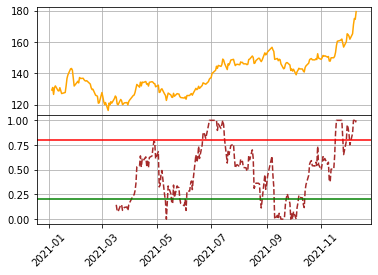

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
plt.subplots_adjust(hspace=0.0)
ax1.grid()
ax2.grid()
ax1.plot(df.index, df['Close'], color='orange')
ax2.plot(df.index, df['StochRSI'], color='brown', linestyle='--')
ax2.axhline(0.20, color='green')
ax2.axhline(0.80, color='red')
plt.xticks(rotation=45);